![Memories Teach](https://lh3.google.com/u/2/d/11o4JyBYhHcmz-LSt63GpOs4lfW9j39T_=w1912-h954-iv1)


`Basic to Advance in Google colab's for image processing, pattern recognition and computer vision`

[Phonepaserth SISAYKEO]

Reference: visioncolab

# Exhaustive Search for the Best Classifier

## Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from   sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
from   tqdm.auto import tqdm
from   IPython.display import clear_output


## Dataset


* F2:  Training data: 800 samples with 2 features. Testing data: 400 samples with 2 features. Classes: 0...1


In [ ]:
!wget https://www.dropbox.com/s/3w6k7vu3xpesjxh/F2.zip
!unzip -qq F2

--2023-07-18 21:38:36--  https://www.dropbox.com/s/3w6k7vu3xpesjxh/F2.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/3w6k7vu3xpesjxh/F2.zip [following]
--2023-07-18 21:38:36--  https://www.dropbox.com/s/raw/3w6k7vu3xpesjxh/F2.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uce05ca2132e831cf50084e23a73.dl.dropboxusercontent.com/cd/0/inline/CAE3FeF50jKJZDRmAGxvMoEFXXUVf0kbGoczgSFeVaSfbB68UTvD2WM1fiZbXreqwQP8jmRtzcwFmAan4N8RJijWHb5RPp0BskV2QtYVUjWt-uIU6QnRAPcPqg5HgTecBQhL8m4CMx6d8S1E7g7u6VYVAaBrDmjTUhQ6qKZV-OP3EA/file# [following]
--2023-07-18 21:38:37--  https://uce05ca2132e831cf50084e23a73.dl.dropboxusercontent.com/cd/0/inline/CAE3FeF50jKJZDRmAGxvMoEFXXUVf0kbGoczgSFeVaSfbB68UTvD2WM1fiZbXreqwQP8jmRtzcwFmAan4N8RJijWHb5RPp0

## Functions

In [ ]:
def load_features(prefix):
    Xtrain  = np.load(prefix+'_Xtrain.npy')            # training samples
    Xtest = np.load(prefix+'_Xtest.npy')             # testing samples
    ytrain  = np.ravel(np.load(prefix+'_dtrain.npy'))  # training labels
    ytest = np.ravel(np.load(prefix+'_dtest.npy'))   # testing labels
    print('Training data: '+str(Xtrain.shape[0]) +' samples with '+str(Xtrain.shape[1]) +' features')
    print(' Testing data: '+str(Xtest.shape[0])+' samples with '+str(Xtest.shape[1])+' features')
    print('      Classes: '+str(int(np.min(ytrain)))+'...'+str(int(np.max(ytrain))))
    return Xtrain,ytrain,Xtest,ytest

def print_confusion(dt,ds,show_heatmap=0,Cnorm=1):
    # dt - true, ds - predicted
    C   = confusion_matrix(dt,ds)
    print('Confusion Matrix:')
    print(C)
    acc = accuracy_score(dt,ds)
    acc_st = "{:.2f}".format(acc*100)
    print('Accuracy = '+str(acc_st))
    if show_heatmap:
      sns.heatmap(C/Cnorm, annot=True, cbar=None, cmap="Blues")
      plt.title("Confusion Matrix"), plt.tight_layout()
      plt.ylabel("True Class"), plt.xlabel("Predicted Class")
      plt.show()

def plot_features(X,d,st,show=1):
    dmin = int(np.min(d))
    dmax = int(np.max(d))
    #colors = np.array(["red","green","blue","yellow","pink","black","orange","purple","beige","brown","gray","cyan","magenta"])
    #colors = 'Greens'
    for j in range(dmin,dmax+1):
        plt.scatter(X[d==j,0],X[d==j,1],label=str(j),s=27)
    plt.grid(True)
    plt.legend()
    plt.xlabel('$x_1$',fontsize=14)
    plt.ylabel('$x_2$',fontsize=14)
    plt.title('Feature Space - '+st,fontsize=14)
    if show==1:
        plt.show()

def plot_features3(X,d,st,show=1,view=(30,60)):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=d, cmap=plt.cm.autumn)
    ax.set_xlabel('$x_1$',fontsize=14)
    ax.set_ylabel('$x_2$',fontsize=14)
    ax.set_zlabel('$x_3$',fontsize=14)
    plt.title('Feature Space - '+st,fontsize=14)
    ax.view_init(view[0],view[1])
    # plt.axis('off')
    # plt.grid(b=None)
    if show == 1:
        plt.show()

def plot_decision_lines(clf,X,show=0,decisionline=1):
    # based on example of https://scikit-learn.org
    h = 0.05
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    if decisionline == 1:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Reds, alpha=0.8)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    if show==1:
        plt.show()

def show_clf_results(clf,X,d,Xt,dt,d0,ds,st,decisionline=1):
    gs = gridspec.GridSpec(1, 2)
    fig = plt.figure(figsize=(18, 6))
    print('Training:')
    acc = accuracy_score(d,d0)
    accst = f'Acc = {acc:.4f}'
    ax = plt.subplot(gs[0,0])
    print_confusion(d,d0)                             # confusion matrix in training
    plot_decision_lines(clf,X,0,decisionline)          # decision lines
    plot_features(X,d,st+' - Training: '+accst,0)     # feature space in training
    ax = plt.subplot(gs[0,1])
    print('Testing:')
    acc = accuracy_score(ds,dt)
    accst = f'Acc = {acc:.4f}'
    print_confusion(dt,ds)                            # confusion matrix in testing
    plot_decision_lines(clf,X,0,decisionline)          # decision lines
    plot_features(Xt,dt,st+' - Testing: '+accst,1)    # feature space in testing


# Training/Testing Data

Loading F2...
Training data: 800 samples with 2 features
 Testing data: 400 samples with 2 features
      Classes: 0...1


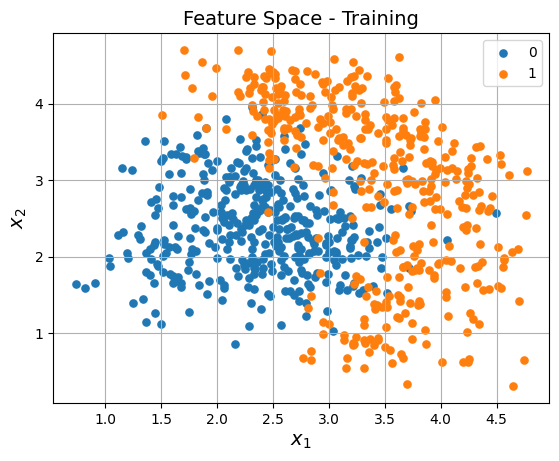

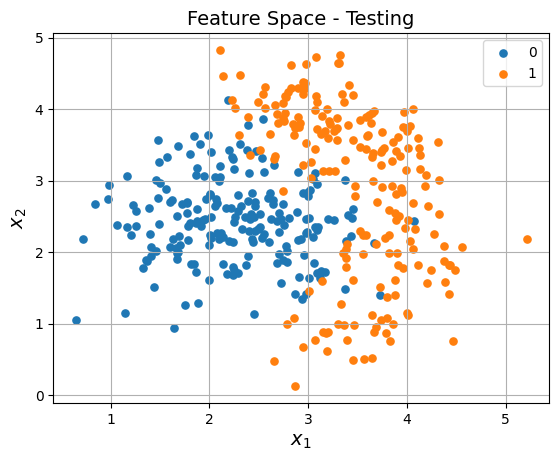

In [ ]:
data = 'F2'
print('Loading '+data+'...')

Xtrain,ytrain,Xtest,ytest   = load_features(data + '/' + data)   # load training and testing data

plot_features(Xtrain,ytrain,'Training')
plot_features(Xtest,ytest,'Testing')


# Classifiers

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.neighbors import KernelDensity
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

class Mahalanobis(BaseEstimator, ClassifierMixin):

    def __init__(self, covi=1):
        self.covi = covi # 0 covi = Cte, 1 = covi is different

    def fit(self, X, y):
        self.classes  = np.sort(np.unique(y))
        training_sets = [X[y == yi] for yi in self.classes]
        m             = X.shape[1]
        n             = len(self.classes)
        self.mc       = np.zeros((n,m))
        self.Ck       = np.zeros((m,m,n))
        for k in range(n):
            Xk             = training_sets[k]
            self.mc[k]     = np.mean(Xk,axis=0)
            self.Ck[:,:,k] = np.cov(Xk.T)
        if self.covi == 0:
            C       = np.zeros((m,m))
            for k in range(n):
                C  = C + self.Ck[:,:,k]
                C = C/n
            for k in range(n):
                self.Ck[:,:,k] = C
        for k in range(n):
            self.Ck[:,:,k] = np.linalg.inv(self.Ck[:,:,k])
        return self

    def predict_distances(self, Xt):
        n = len(self.classes)
        nt = Xt.shape[0]
        distances = np.zeros((nt,n))
        for k in range(n):
            mk = self.mc[k]
            for i in range(nt):
                xdi  = Xt[i]-mk
                dik   = np.matmul(xdi, self.Ck[:,:,k])
                distances[i,k] = dik.dot(xdi)
        return distances

    def predict(self, X):
        return self.classes[np.argmin(self.predict_distances(X), 1)]

class KDEClassifier(BaseEstimator, ClassifierMixin):
    """Bayesian generative classification based on KDE
    from https://jakevdp.github.io/PythonDataScienceHandbook/05.13-kernel-density-estimation.html

    Parameters
    ----------
    bandwidth : float
        the kernel bandwidth within each class
    kernel : str
        the kernel name, passed to KernelDensity
    """
    def __init__(self, bandwidth=1.0, kernel='gaussian'):
        self.bandwidth = bandwidth
        self.kernel = kernel

    def fit(self, X, y):
        self.classes_ = np.sort(np.unique(y))
        training_sets = [X[y == yi] for yi in self.classes_]
        self.models_ = [KernelDensity(bandwidth=self.bandwidth,
                                      kernel=self.kernel).fit(Xi)
                        for Xi in training_sets]
        self.logpriors_ = [np.log(Xi.shape[0] / X.shape[0])
                           for Xi in training_sets]
        return self

    def predict_proba(self, X):
        logprobs = np.array([model.score_samples(X)
                             for model in self.models_]).T
        result = np.exp(logprobs + self.logpriors_)
        return result / result.sum(1, keepdims=True)

    def predict(self, X):
        return self.classes_[np.argmax(self.predict_proba(X), 1)]

# List of classifiers to be evaluated

Classifier  | Traing | Testing:
-------------------------------
 0: dmin    | 84.75% | 85.50%
 0: knn3    | 93.88% | 93.50%
 0: knn5    | 93.62% | 93.75%
 0: knn7    | 94.38% | 94.25%
 0: knn9    | 94.25% | 94.25%
 0: nahiv   | 91.38% | 93.00%
 0: bayes   | 90.62% | 90.75%
 0: lda     | 84.88% | 87.00%
 0: qda     | 91.38% | 92.75%
 0: maha0   | 84.75% | 86.75%
 0: maha    | 88.62% | 89.00%
 0: tree3   | 91.88% | 92.00%
 0: tree5   | 94.62% | 92.25%
 0: tree7   | 94.62% | 92.25%
 0: rf3     | 92.62% | 92.50%
 0: rf4     | 93.88% | 93.50%
 0: rf5     | 95.12% | 94.25%
 0: rf6     | 96.12% | 93.50%
 0: rf7     | 97.62% | 93.25%
 0: svmlin  | 84.62% | 86.25%
 0: svmrbf  | 93.12% | 94.75%
 0: svmpoly | 92.38% | 92.25%
 0: sigmoid | 84.50% | 86.00%
 0: nn1     | 93.50% | 93.75%
 0: nn2     | 93.00% | 93.25%
-------------------------------
20: svmrbf  | 93.12% | 94.75% <= MAX
-------------------------------
Training:
Confusion Matrix:
[[367  33]
 [ 22 378]]
Accuracy = 93.12
Testing:
Confusio

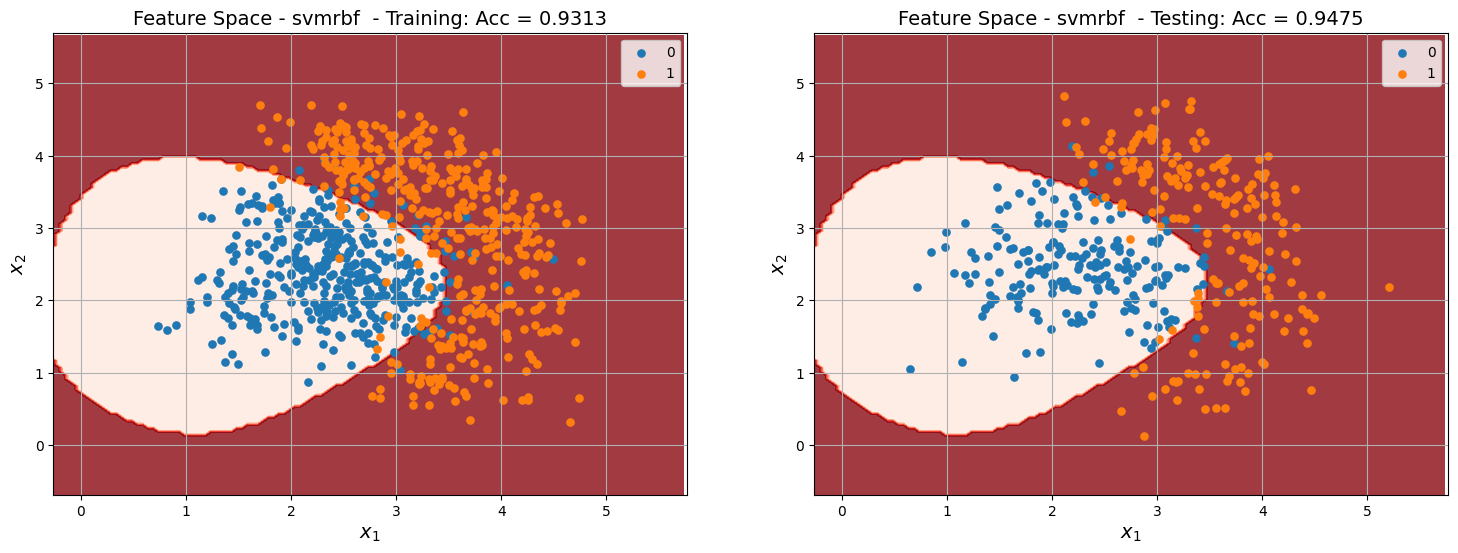

In [ ]:
cls = []

cls.append({'name':'dmin'   ,'clf':NearestCentroid()})
cls.append({'name':'knn3'   ,'clf':KNeighborsClassifier(n_neighbors=3)})
cls.append({'name':'knn5'   ,'clf':KNeighborsClassifier(n_neighbors=5)})
cls.append({'name':'knn7'   ,'clf':KNeighborsClassifier(n_neighbors=7)})
cls.append({'name':'knn9'   ,'clf':KNeighborsClassifier(n_neighbors=9)})
cls.append({'name':'nahiv'  ,'clf':GaussianNB()})
cls.append({'name':'bayes'  ,'clf':KDEClassifier(bandwidth=1.0)})
cls.append({'name':'lda'    ,'clf':LinearDiscriminantAnalysis()})
cls.append({'name':'qda'    ,'clf':QuadraticDiscriminantAnalysis()})
cls.append({'name':'maha0'  ,'clf':Mahalanobis(covi=0)})
cls.append({'name':'maha'   ,'clf':Mahalanobis()})
cls.append({'name':'tree3'  ,'clf':DecisionTreeClassifier(max_depth=3)})
cls.append({'name':'tree5'  ,'clf':DecisionTreeClassifier(max_depth=5)})
cls.append({'name':'tree7'  ,'clf':DecisionTreeClassifier(max_depth=5)})
cls.append({'name':'rf3'    ,'clf':RandomForestClassifier(max_depth=3)})
cls.append({'name':'rf4'    ,'clf':RandomForestClassifier(max_depth=4)})
cls.append({'name':'rf5'    ,'clf':RandomForestClassifier(max_depth=5)})
cls.append({'name':'rf6'    ,'clf':RandomForestClassifier(max_depth=6)})
cls.append({'name':'rf7'    ,'clf':RandomForestClassifier(max_depth=7)})
cls.append({'name':'svmlin' ,'clf':SVC(kernel = "linear", gamma=0.2, C=0.1)})
cls.append({'name':'svmrbf' ,'clf':SVC(kernel = "rbf", gamma=0.5,C=0.3)})
cls.append({'name':'svmpoly','clf':SVC(kernel = "poly", gamma=0.2, degree = 3, C=0.1)})
cls.append({'name':'sigmoid','clf':SVC(kernel = "sigmoid", gamma=0.01, C=1.5)})
cls.append({'name':'nn1','clf':MLPClassifier(solver='adam', learning_rate_init = 1e-3,hidden_layer_sizes=(12,),max_iter=1000)})
cls.append({'name':'nn2','clf':MLPClassifier(solver='adam', learning_rate_init = 1e-3,hidden_layer_sizes=(12,6),max_iter=1000)})




n    = len(cls)
acc_max = 0
print('Classifier  | Traing | Testing:')
print('-------------------------------')

for k in range(n):
  clf       = cls[k]['clf']
  clf_st    = "{:7s}".format(cls[k]['name'])
  clf.fit(Xtrain, ytrain)
  y0        = clf.predict(Xtrain)
  ypred     = clf.predict(Xtest)
  acc_train = accuracy_score(y0,ytrain)
  acc_test  = accuracy_score(ypred,ytest)
  acc_st    = "{:.2f}".format(acc_test*100)
  acc_st0   = "{:.2f}".format(acc_train*100)
  k_st      = "{:2d}".format(j)
  print(k_st+': '+clf_st+' | '+acc_st0+'%'+' | '+acc_st+'%')
  if acc_test>acc_max:
    kmax     = k
    acc_max  = acc_test
    acc_0    = acc_train
    clf_max  = clf
    clf_name = cls[k]['name']

clf_st  = "{:7s}".format(clf_name)
acc_st  = "{:.2f}".format(acc_max*100)
acc_st0 = "{:.2f}".format(acc_0*100)
k_st    = "{:2d}".format(kmax)
print('-------------------------------')
print(k_st+': '+clf_st+' | '+acc_st0+'%'+' | '+acc_st+'% <= MAX')
print('-------------------------------')


ypred  = clf_max.predict(Xtest)
y0     = clf_max.predict(Xtrain)
show_clf_results(clf_max,Xtrain,ytrain,
                   Xtest,ytest,y0,ypred,clf_st)    # show performance and feature space

